import necessary libraries

In [403]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

 Step 1: Load the Dataset

In [404]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fratzcan/usa-house-prices")

print("Path to dataset files:", path)

Path to dataset files: /Users/invi/.cache/kagglehub/datasets/fratzcan/usa-house-prices/versions/1


In [405]:
dt = pd.read_csv('/Users/invi/.cache/kagglehub/datasets/fratzcan/usa-house-prices/versions/1/USA Housing Dataset.csv')

In [406]:
dt.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


Step 2: Select Numerical Features

In [407]:
dt = dt.drop(columns=['date', 'street', 'city', 'statezip', 'country'])


Step 3: Split Features  and Target

In [408]:
target_column = 'price'

# Shuffle and split the data
shuffled_indices = np.random.permutation(len(dt))
split_index = int(len(dt) * 0.8)
train_data, test_data = dt.iloc[shuffled_indices[:split_index]], dt.iloc[shuffled_indices[split_index:]]

# Separate features and target variable
x_train, y_train = train_data.drop(target_column, axis=1), train_data[target_column].values.reshape(-1, 1)
x_test, y_test = test_data.drop(target_column, axis=1), test_data[target_column].values.reshape(-1, 1)

# Z-score normalization
x_train_mean, x_train_std = np.mean(x_train, axis=0), np.std(x_train, axis=0)
x_test_normalized = (x_test - x_train_mean) / x_train_std
x_train_normalized = (x_train - x_train_mean) / x_train_std

# Normalizing target variable 
y_train_mean, y_train_std = np.mean(y_train), np.std(y_train)
y_train_normalized = (y_train - y_train_mean) / y_train_std
y_test_normalized = (y_test - y_train_mean) / y_train_std

# Add bias term
x_train_normalized = np.c_[np.ones(x_train_normalized.shape[0]), x_train_normalized]
x_test_normalized = np.c_[np.ones(x_test_normalized.shape[0]), x_test_normalized]

- better r2= 0.56 at alpha =0.2 than r2= 0.3 at alpha=0.3

Mean Squared Error (MSE): 49229448472.697235
R-squared (R²): 0.527732432452328


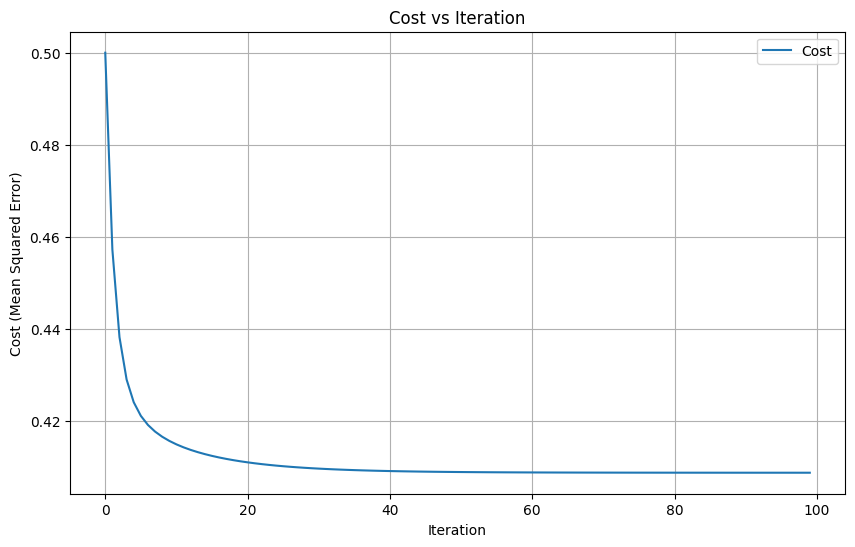

In [ ]:
def linear_regression_gradient_descent_with_cost(x, y, learning_rate, num_iterations):
    num_features = x.shape[1]
    theta = np.zeros((num_features, 1))
    cost_history = []

    for i in range(num_iterations):
        predictions = x.dot(theta)
        error = predictions - y
        cost = (1 / (2 * len(x))) * np.sum(error ** 2)
        cost_history.append(cost)
        gradient = (1 / len(x)) * x.T.dot(error)
        theta -= learning_rate * gradient

    return theta, cost_history

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def r_squared(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)


# Train the model
num_iterations = 100
learning_rate = 0.1
theta, cost_history = linear_regression_gradient_descent_with_cost(
    x_train_normalized, y_train_normalized, learning_rate, num_iterations
)

# Make predictions
y_pred_normalized = x_test_normalized.dot(theta)
y_pred = y_pred_normalized * y_train_std + y_train_mean

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r_squared(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Plot cost vs iteration
plt.figure(figsize=(10, 6))
plt.plot(range(num_iterations), cost_history, label='Cost')
plt.xlabel('Iteration')
plt.ylabel('Cost (Mean Squared Error)')
plt.title('Cost vs Iteration')
plt.legend()
plt.grid()
plt.show()